### Logistic Regression

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

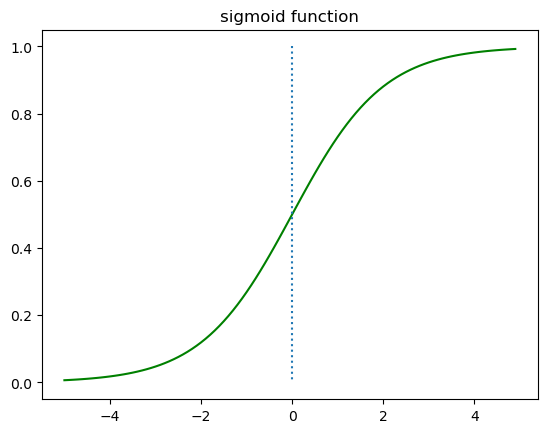

In [ ]:
# float ver. range function
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('sigmoid function')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

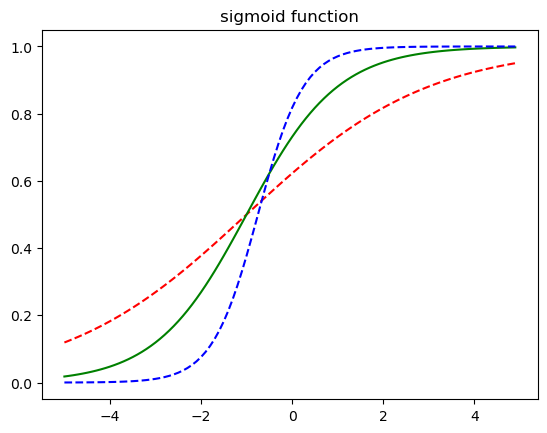

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(2*x + 1.5)

plt.plot(x, y1, 'r', linestyle = '--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle = '--')

plt.title('sigmoid function')
plt.show

Logistic regression using Pytorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [83]:
x_data = [[1,2], 
          [2,3], 
          [3,1], 
          [4,3], 
          [5,3], 
          [6,2]]
y_data = [[0], 
          [0], 
          [0], 
          [1], 
          [1], 
          [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


Generally in deeplearning workflow, model $WX + \mathbf b$ is written as below :
$$
XW + \mathbf b
$$

In [ ]:
# parameters for XW + b
# y : (6,1) x : (6,2)
W = torch.zeros((2,1), requires_grad=True)
# b sholud be (6,1) but 1 also works <-- thanks to broadcasting!
b = torch.zeros(1, requires_grad=True)

In [85]:
#hypothesis = 1/(1 + torch.exp(-(x_train.matmul(W) + b)))
# or 
hypothesis = torch.sigmoid(x_train.matmul(W)+ b)

In [86]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [87]:
print(y_train)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [88]:
# loss funtion
losses = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(hypothesis))
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [89]:
# or can use 
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
# actual training
# we have data(x, y), W, b, cost function

optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch {:4d}/{}, cost : {:6f}'.format(epoch, nb_epochs, cost.item()))


epoch    0/1000, cost : 0.008303
epoch  100/1000, cost : 0.007995
epoch  200/1000, cost : 0.007708
epoch  300/1000, cost : 0.007441
epoch  400/1000, cost : 0.007192
epoch  500/1000, cost : 0.006959
epoch  600/1000, cost : 0.006741
epoch  700/1000, cost : 0.006536
epoch  800/1000, cost : 0.006343
epoch  900/1000, cost : 0.006161
epoch 1000/1000, cost : 0.005990


In [105]:
print(W)
print(b)

tensor([[4.4333],
        [2.1319]], requires_grad=True)
tensor([-19.8678], requires_grad=True)


In [ ]:
print(hypothesis)

tensor([[1.4090e-05],
        [9.9000e-03],
        [1.1708e-02],
        [9.8608e-01],
        [9.9983e-01],
        [9.9998e-01]], grad_fn=<SigmoidBackward0>)


In [107]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
